In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('new_data.csv')

In [4]:
df.head()

,active_power
0,380.047791
1,447.605713
2,710.587280
3,736.647827
4,1493.807983


In [5]:
df.tail()

,active_power
8417,711.683228
8418,1403.121948
8419,2240.629883
8420,2771.110107
8421,1684.353027


In [7]:
df1=df.reset_index()['active_power']

In [8]:
df1

0        380.047791
1        447.605713
2        710.587280
3        736.647827
4       1493.807983
           ...     
8417     711.683228
8418    1403.121948
8419    2240.629883
8420    2771.110107
8421    1684.353027
Name: active_power, Length: 8422, dtype: float64

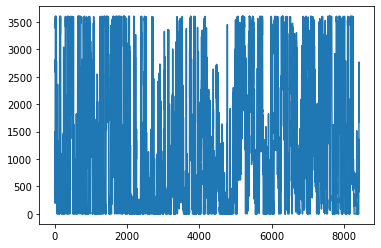

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0        380.047791
1        447.605713
2        710.587280
3        736.647827
4       1493.807983
           ...     
8417     711.683228
8418    1403.121948
8419    2240.629883
8420    2771.110107
8421    1684.353027
Name: active_power, Length: 8422, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.1056364 ]
 [0.12436757]
 [0.1972821 ]
 ...
 [0.62150322]
 [0.76858469]
 [0.46726935]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(5474, 2948)

In [17]:
train_data

array([[0.1056364 ],
       [0.12436757],
       [0.1972821 ],
       ...,
       [0.44884703],
       [0.55389676],
       [0.60604457]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(5373, 100)
(5373,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(2847, 100)
(2847,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 5373 samples, validate on 2847 samples
Epoch 1/100
5373/5373 [==============================] - 25s 5ms/sample - loss: 0.0720 - val_loss: 0.0503
Epoch 2/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0433 - val_loss: 0.0335
Epoch 3/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0317 - val_loss: 0.0242
Epoch 4/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0269 - val_loss: 0.0199
Epoch 5/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0241 - val_loss: 0.0205
Epoch 6/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0235 - val_loss: 0.0205
Epoch 7/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0231 - val_loss: 0.0186
Epoch 8/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0228 - val_loss: 0.0184
Epoch 9/100
5373/5373 [==============================] - 16s 3ms/sample - loss: 0.0231 - val_loss: 0.018

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.0.0'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1682.2896056512943

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1845.664144553504

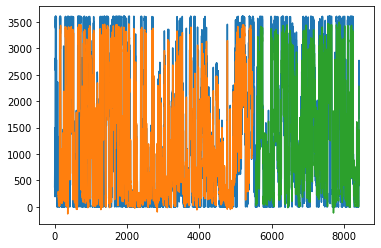

In [77]:
### Plotting 
# shift train predictions for plotting
fig = plt.figure()
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
fig.savefig("Analysis_Images/Algorithm_working.png")

In [40]:
len(test_data)

2948

In [42]:
x_input=test_data[2848:].reshape(1,-1)
x_input.shape


(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.022090066759803677,
 0.046114065150496555,
 0.20649950524938893,
 0.15265057881281546,
 0.1902666902857485,
 0.12510433448374614,
 0.04762305941186908,
 0.038769673990896786,
 0.05075425211888567,
 0.10431977041209502,
 0.17184756821653704,
 0.17983611648402711,
 0.12335759366660325,
 0.0815532065996539,
 0.16107678110730603,
 0.1347994576170574,
 0.4203920042865949,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.0002639717325893207,
 0.

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<72):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4389169]
101
1 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.20900668e-02 4.61140652e-02
 2.06499505e-01 1.52650579e-01 1.90266690e-01 1.25104334e-01
 4.76230594e-02 3.87696740e-02 5.07542521e-02 1.04319770e-01
 1.71847568e-01 1.79836116e-01 1.23357594e-01 8.15532066e-02
 1.61076781e-01 1.34799458e-01 4.20392004e-01 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.71773060e-02
 2.63971733e-04 5.62304062e-02 1.70528899e-02 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e

8 day output [[0.23092408]]
9 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.20900668e-02 4.61140652e-02
 2.06499505e-01 1.52650579e-01 1.90266690e-01 1.25104334e-01
 4.76230594e-02 3.87696740e-02 5.07542521e-02 1.04319770e-01
 1.71847568e-01 1.79836116e-01 1.23357594e-01 8.15532066e-02
 1.61076781e-01 1.34799458e-01 4.20392004e-01 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.71773060e-02
 2.63971733e-04 5.62304062e-02 1.70528899e-02 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04

16 day output [[0.40321457]]
17 day input [2.63971733e-04 2.63971733e-04 2.20900668e-02 4.61140652e-02
 2.06499505e-01 1.52650579e-01 1.90266690e-01 1.25104334e-01
 4.76230594e-02 3.87696740e-02 5.07542521e-02 1.04319770e-01
 1.71847568e-01 1.79836116e-01 1.23357594e-01 8.15532066e-02
 1.61076781e-01 1.34799458e-01 4.20392004e-01 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.71773060e-02
 2.63971733e-04 5.62304062e-02 1.70528899e-02 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 3.91826802e-02 2.63971733e-04 2.63971733e-

23 day output [[0.3575914]]
24 day input [1.25104334e-01 4.76230594e-02 3.87696740e-02 5.07542521e-02
 1.04319770e-01 1.71847568e-01 1.79836116e-01 1.23357594e-01
 8.15532066e-02 1.61076781e-01 1.34799458e-01 4.20392004e-01
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 3.71773060e-02 2.63971733e-04 5.62304062e-02 1.70528899e-02
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 3.91826802e-02 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-0

29 day output [[0.28213266]]
30 day input [1.79836116e-01 1.23357594e-01 8.15532066e-02 1.61076781e-01
 1.34799458e-01 4.20392004e-01 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 3.71773060e-02 2.63971733e-04
 5.62304062e-02 1.70528899e-02 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.91826802e-02
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.82199752e-02 1.52470742e-01 3.77071905e-

37 day output [[0.30125806]]
38 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 3.71773060e-02 2.63971733e-04
 5.62304062e-02 1.70528899e-02 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.91826802e-02
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.82199752e-02 1.52470742e-01 3.77071905e-01 1.25962508e-01
 1.11072380e-01 1.97585964e-01 3.89294944e-01 6.21503219e-01
 7.68584688e-01 4.67269350e-01 4.38916892e-

45 day output [[0.3740248]]
46 day input [2.63971733e-04 2.63971733e-04 3.71773060e-02 2.63971733e-04
 5.62304062e-02 1.70528899e-02 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.91826802e-02
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.82199752e-02 1.52470742e-01 3.77071905e-01 1.25962508e-01
 1.11072380e-01 1.97585964e-01 3.89294944e-01 6.21503219e-01
 7.68584688e-01 4.67269350e-01 4.38916892e-01 4.22580451e-01
 3.84087950e-01 3.38669628e-01 2.95228183e-01 2.60359317e-01
 2.37813503e-01 2.28387460e-01 2.30924085e-0

53 day output [[0.27425644]]
54 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 3.91826802e-02
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.82199752e-02 1.52470742e-01 3.77071905e-01 1.25962508e-01
 1.11072380e-01 1.97585964e-01 3.89294944e-01 6.21503219e-01
 7.68584688e-01 4.67269350e-01 4.38916892e-01 4.22580451e-01
 3.84087950e-01 3.38669628e-01 2.95228183e-01 2.60359317e-01
 2.37813503e-01 2.28387460e-01 2.30924085e-01 2.43482992e-01
 2.63839990e-01 2.89483696e-01 3.17575455e-01 3.45142037e-01
 3.69554073e-01 3.89097214e-01 4.03214574e-

59 day output [[0.24473192]]
60 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 3.91826802e-02 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.82199752e-02 1.52470742e-01
 3.77071905e-01 1.25962508e-01 1.11072380e-01 1.97585964e-01
 3.89294944e-01 6.21503219e-01 7.68584688e-01 4.67269350e-01
 4.38916892e-01 4.22580451e-01 3.84087950e-01 3.38669628e-01
 2.95228183e-01 2.60359317e-01 2.37813503e-01 2.28387460e-01
 2.30924085e-01 2.43482992e-01 2.63839990e-01 2.89483696e-01
 3.17575455e-01 3.45142037e-01 3.69554073e-01 3.89097214e-01
 4.03214574e-01 4.12139356e-01 4.16157693e-01 4.15085167e-01
 4.08360034e-01 3.95666510e-01 3.77819151e-

66 day output [[0.3611331]]
67 day input [2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 3.91826802e-02 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.63971733e-04
 2.63971733e-04 2.63971733e-04 2.63971733e-04 2.82199752e-02
 1.52470742e-01 3.77071905e-01 1.25962508e-01 1.11072380e-01
 1.97585964e-01 3.89294944e-01 6.21503219e-01 7.68584688e-01
 4.67269350e-01 4.38916892e-01 4.22580451e-01 3.84087950e-01
 3.38669628e-01 2.95228183e-01 2.60359317e-01 2.37813503e-01
 2.28387460e-01 2.30924085e-01 2.43482992e-01 2.63839990e-01
 2.89483696e-01 3.17575455e-01 3.45142037e-01 3.69554073e-01
 3.89097214e-01 4.03214574e-01 4.12139356e-01 4.16157693e-01
 4.15085167e-01 4.08360034e-01 3.95666510e-01 3.77819151e-01
 3.57591391e-01 3.39332283e-01 3.26128453e-01 3.16898048e-01
 3.07898194e-01 2.96385795e-01 2.82132655e-0

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,173)

In [73]:
print(len(day_pred))
print(lst_output)

72
[[0.4389168918132782], [0.42258045077323914], [0.3840879499912262], [0.33866962790489197], [0.29522818326950073], [0.2603593170642853], [0.23781350255012512], [0.22838746011257172], [0.2309240847826004], [0.24348299205303192], [0.263839989900589], [0.2894836962223053], [0.31757545471191406], [0.34514203667640686], [0.3695540726184845], [0.3890972137451172], [0.40321457386016846], [0.412139356136322], [0.41615769267082214], [0.41508516669273376], [0.4083600342273712], [0.3956665098667145], [0.37781915068626404], [0.3575913906097412], [0.3393322825431824], [0.32612845301628113], [0.31689804792404175], [0.3078981935977936], [0.296385794878006], [0.28213265538215637], [0.26706191897392273], [0.2543007433414459], [0.24681644141674042], [0.2462633103132248], [0.2527502775192261], [0.2652231454849243], [0.28202423453330994], [0.30125805735588074], [0.3210228383541107], [0.3396347165107727], [0.355826735496521], [0.3687655031681061], [0.37781837582588196], [0.3822559714317322], [0.381204962

In [76]:
df = {'lst_output' : lst_output}
df = pd.DataFrame(df)
df.to_csv("final_output.csv")

In [63]:
import matplotlib.pyplot as plt

In [64]:
#1258
len(df1)

8422

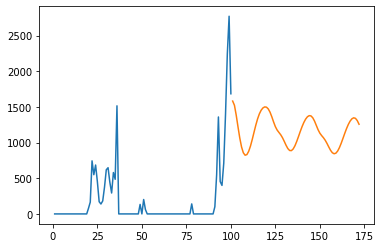

In [78]:
fig = plt.figure()
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
fig.savefig("Analysis_Images/model_prediction.png")

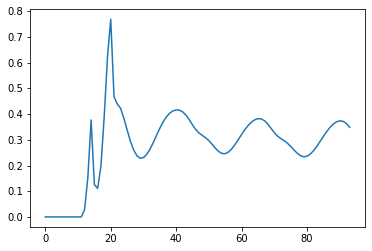

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[8400:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

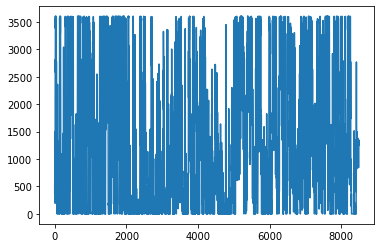

In [79]:
fig = plt.figure()
plt.plot(df3)
fig.savefig("Analysis_Images/Total_view_of_prediction.png")